# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

ModuleNotFoundError: No module named 'xgboost'

In [36]:
os.listdir()

['.ipynb_checkpoints',
 '71 Centuries of Virat Kohli.csv',
 'Cause of Deaths(Data Analysis).ipynb',
 'cause_of_deaths.csv',
 'Data Analysis(FIFA World Cup).ipynb',
 'Data Analysis(Hotel booking).ipynb',
 'Data Analysis(Indian Railway).ipynb',
 'Data Analysis(Instagram Reach Analysis).ipynb',
 'Data Analysis(Netflix).ipynb',
 'Data Analysis(Zomato).ipynb',
 'Data Analytics using logistic Regression(Student data).ipynb',
 'hotel_bookings 2.csv',
 'Indian_railway1.csv',
 'instagram_reach.csv',
 'location_booktable.csv',
 'location_online.csv',
 'location_Type.csv',
 'netflix1.csv',
 'Students data.csv',
 'Virat Kohli 71 Centuries(Data Analysis).ipynb',
 'Virat_Kohli_ODI.csv',
 'WorldCupMatches.csv',
 'WorldCupPlayers.csv',
 'WorldCups.csv',
 'zomato.csv']

In [37]:
df=pd.read_csv('instagram_reach.csv')

In [38]:
df.head(5)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [39]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [40]:
df.isnull()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


In [41]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [42]:
df.drop(['Caption'],axis=1,inplace=True)
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [44]:
df.shape

(100, 7)

Remove unnecessary column

In [45]:
#because there is only 6 main features (columns), "Unnamed:0" and "S.No" columns will removed
df.drop(['Unnamed: 0','S.No'],axis=1,inplace=True)
df.dropna(inplace=True)

In [46]:
df.columns

Index(['USERNAME', 'Followers', 'Hashtags', 'Time since posted', 'Likes'], dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Followers          100 non-null    int64 
 2   Hashtags           100 non-null    object
 3   Time since posted  100 non-null    object
 4   Likes              100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [48]:
Time_since_posted_in_hours=[]

for i in df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
df['Times since posted (hours)'] = se.values
df['Times since posted (hours)'] = pd.to_numeric(df['Times since posted (hours)'])
df = df.drop('Time since posted', axis=1)

In [49]:
#check new data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Username                    100 non-null    object
 1   Followers                   100 non-null    int64 
 2   Hashtags                    100 non-null    object
 3   Likes                       100 non-null    int64 
 4   Times since posted (hours)  100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


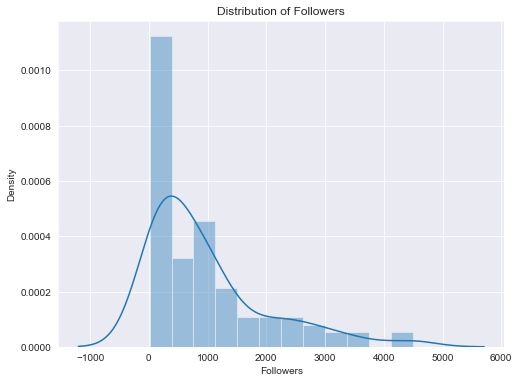

In [50]:
#Distribution of followers variable
plt.figure(figsize=(8,6))
sns.distplot(df['Followers'])
plt.title('Distribution of Followers')
plt.show()

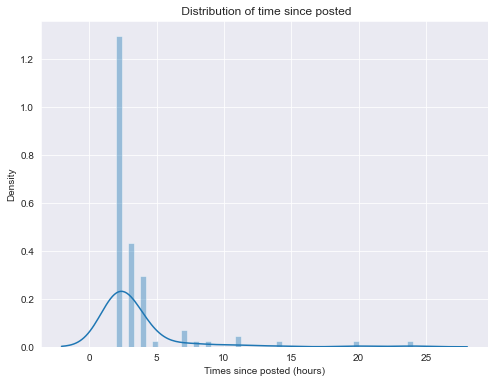

In [51]:
plt.figure(figsize=(8,6))
sns.distplot(df['Times since posted (hours)'])
plt.title(' Distribution of time since posted')
plt.show()

unique username

In [52]:
print('There are',df['Username'].nunique(),'username')

There are 95 username


Caption variables

In analyzing this variable, I will use wordcloud to know which words are mostly used in caption

Times since posted in hours and likes
I will use scatterplot to visualize the relationship between these variables

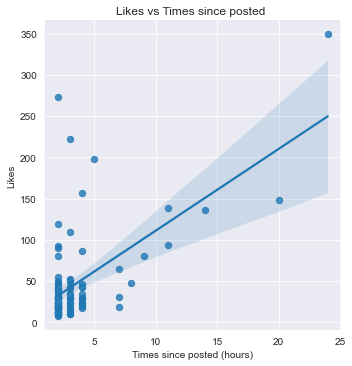

In [53]:
sns.lmplot(x='Times since posted (hours)',y='Likes',data=df,fit_reg=True,scatter_kws={"marker":'B',"s":40})
plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

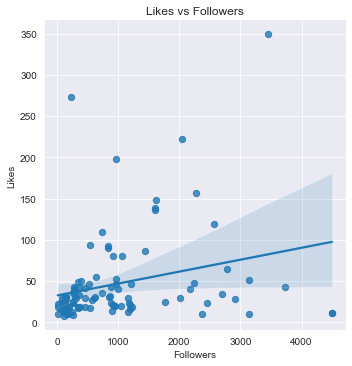

In [54]:
sns.lmplot(x='Followers',y='Likes',data=df,fit_reg=True,scatter_kws={"marker":"D","s":40})
plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

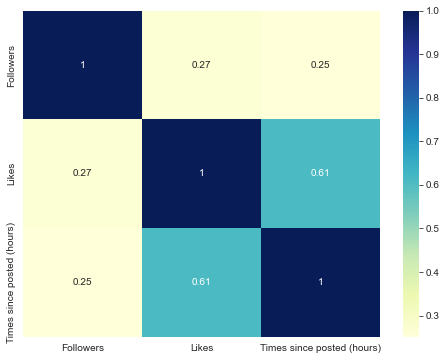

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [56]:
#Define x variables and y variable
x=df[['Followers','Times since posted (hours)']]
y=df[['Likes']]
df.head()

#Split train set and test set
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [59]:
#Fit the model and predict the value of test set
model = XGBRegressor()
model.fit(X_train, y_train)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

NameError: name 'XGBRegressor' is not defined